In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the preprocessed dataset
file_path = "../data/preprocessed_breast_cancer_data.csv"  # Path to preprocessed file
data = pd.read_csv(file_path)

In [3]:
# displaying basic information
print("Dataset loaded for EDA")
print(data.info())
print(data.describe())

Dataset loaded for EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2509 non-null   float64
 2   Type of Breast Surgery          2509 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     2509 non-null   object 
 6   Chemotherapy                    2509 non-null   object 
 7   Pam50 + Claudin-low subtype     2509 non-null   object 
 8   Cohort                          2509 non-null   float64
 9   ER status measured by IHC       2509 non-null   object 
 10  ER Status                       2509 non-null   object 
 11  Neoplasm Histologic Grade       2509 non-null   float64
 12  HER2 status

In [4]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 2509 rows and 34 columns.


In [5]:
print("\nUnique values in each column:")
print(data.nunique())


Unique values in each column:
Patient ID                        2509
Age at Diagnosis                  1843
Type of Breast Surgery               2
Cancer Type                          2
Cancer Type Detailed                 8
Cellularity                          3
Chemotherapy                         2
Pam50 + Claudin-low subtype          7
Cohort                               9
ER status measured by IHC            2
ER Status                            2
Neoplasm Histologic Grade            3
HER2 status measured by SNP6         4
HER2 Status                          2
Tumor Other Histologic Subtype       8
Hormone Therapy                      2
Inferred Menopausal State            2
Integrative Cluster                 11
Primary Tumor Laterality             2
Lymph nodes examined positive       32
Mutation Count                      32
Nottingham prognostic index        436
Oncotree Code                        8
Overall Survival (Months)         1743
Overall Survival Status          

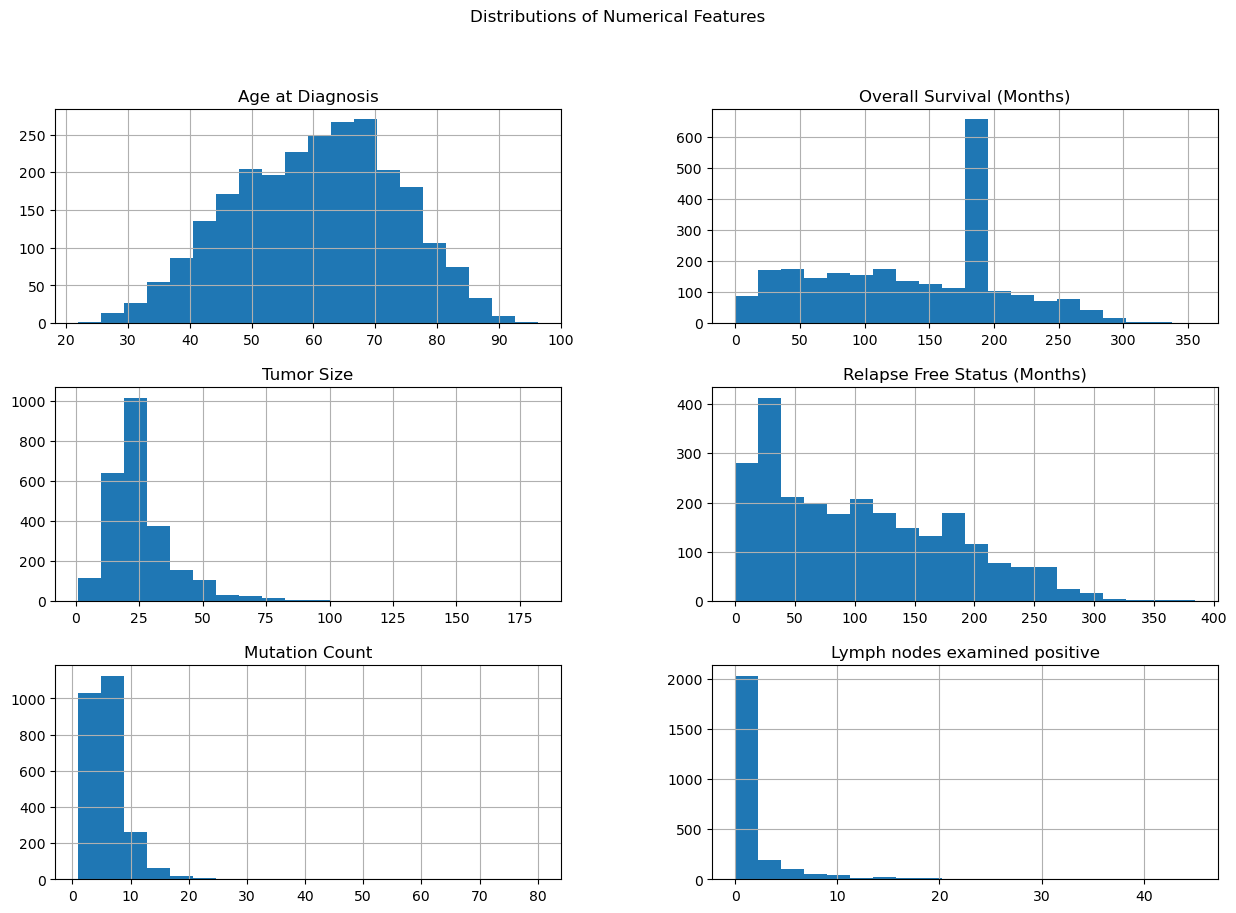

In [6]:
# Plot histograms for numerical columns
numerical_cols = [
    'Age at Diagnosis', 'Overall Survival (Months)', 'Tumor Size',
    'Relapse Free Status (Months)', 'Mutation Count', 'Lymph nodes examined positive'
]
data[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numerical Features")
plt.show()

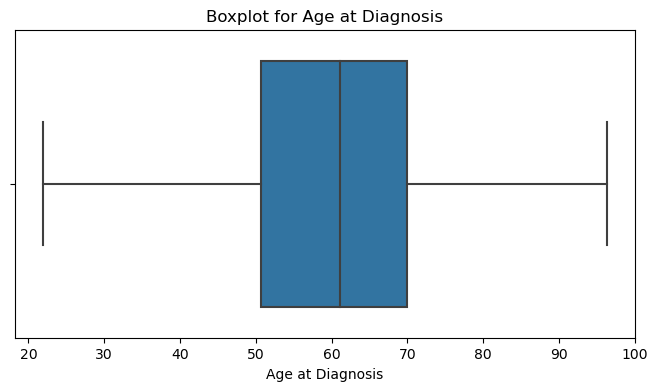

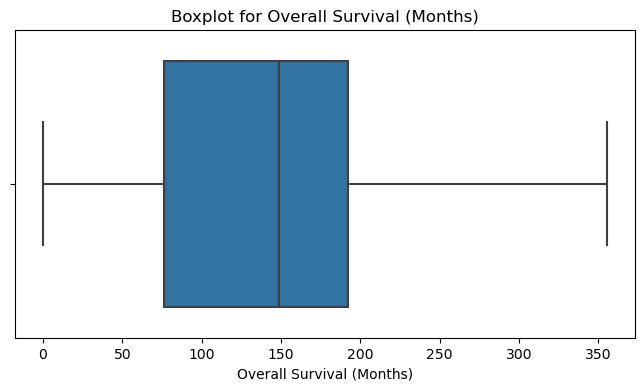

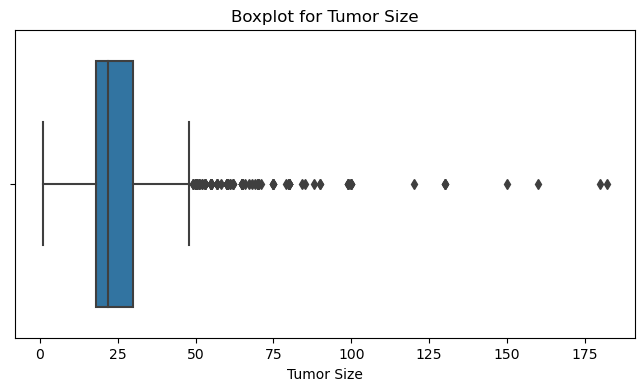

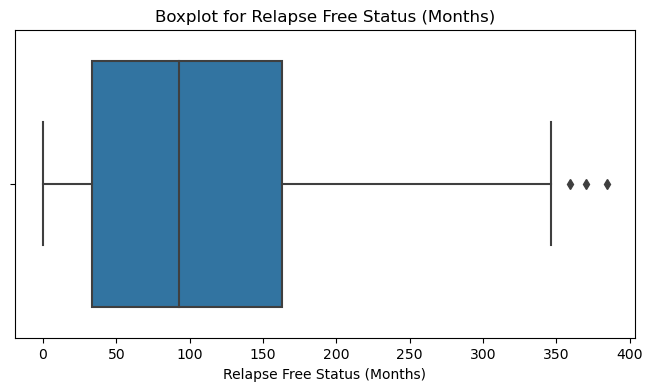

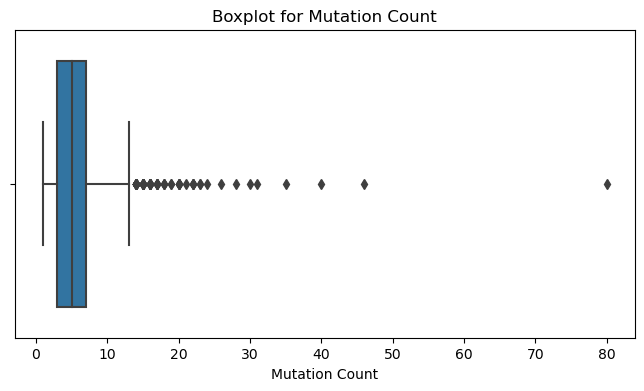

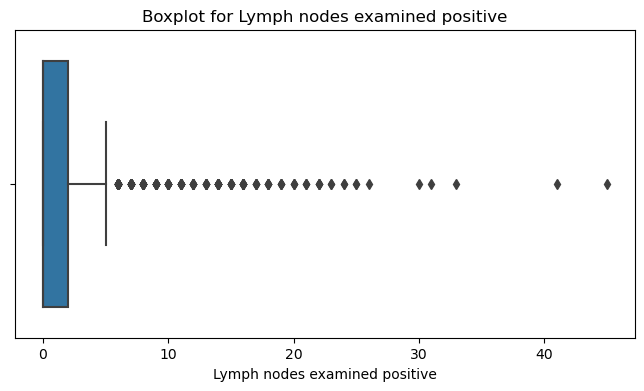

In [7]:
# Plot boxplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

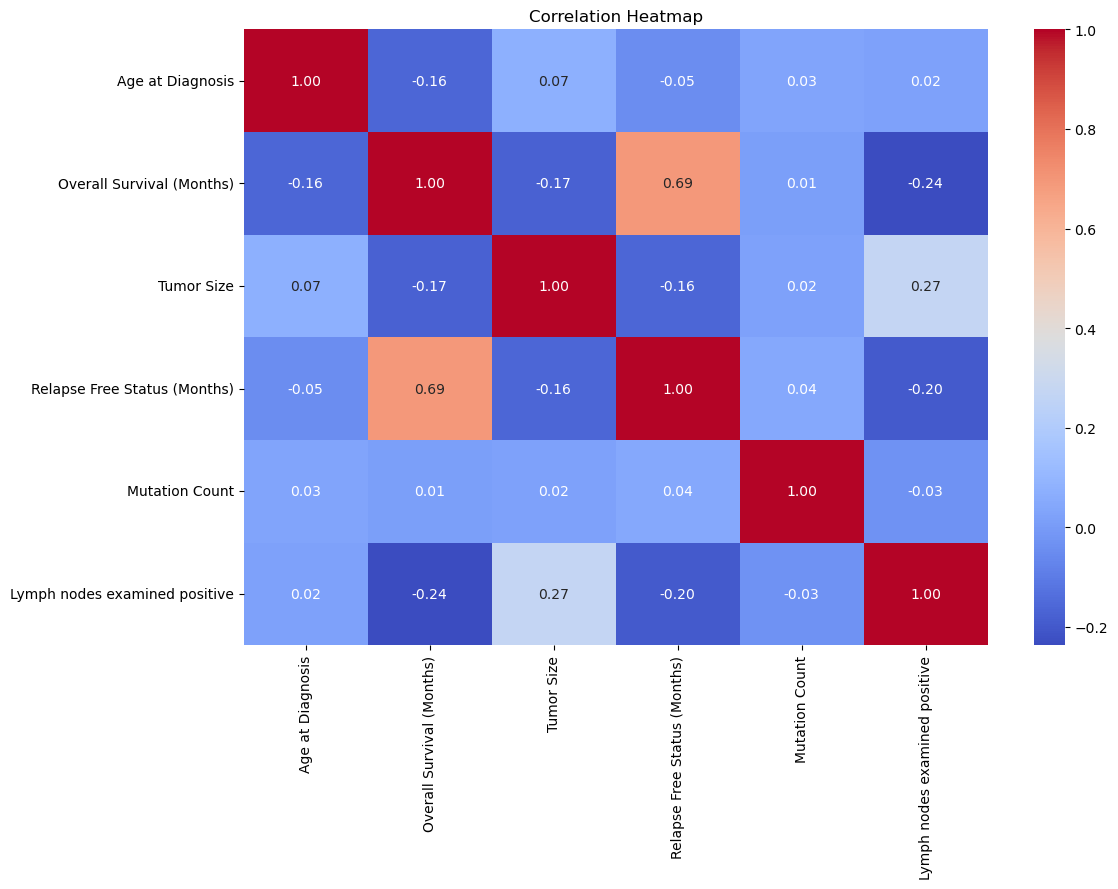

In [8]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, 
            fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap shows a high positive correlation (0.69) between `Relapse Free Status (Months)` and `Overall Survival (Months)`

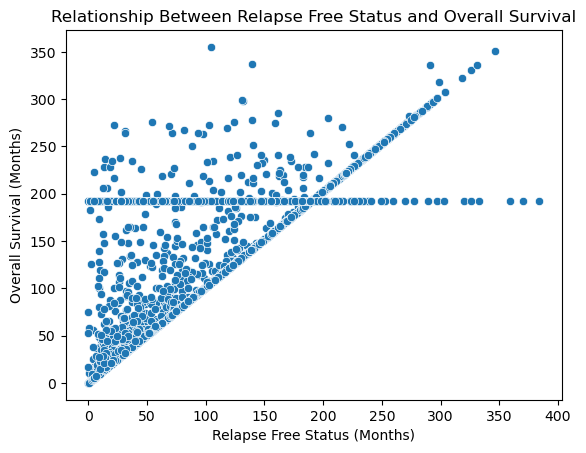

In [9]:
# scatter plot
sns.scatterplot(x=data['Relapse Free Status (Months)'], 
                y=data['Overall Survival (Months)'])
plt.title("Relationship Between Relapse Free Status and Overall Survival")
plt.xlabel("Relapse Free Status (Months)")
plt.ylabel("Overall Survival (Months)")
plt.show()

**Observations**:
1. **Positive Relationship**:
- There is a clear linear trend where as Relapse Free Status (Months) increases, Overall Survival (Months) also increases.
- This aligns with the correlation of 0.69 observed in the heatmap.

2. **Distinct Clusters**:
- Many data points lie along the diagonal, indicating cases where Relapse Free Status (Months) is equal to or close to Overall Survival (Months). This is expected as relapse-free patients likely survive longer without recurrence.
- There’s a horizontal line of data points around Overall Survival (Months) ~200, suggesting some cases where survival doesn't vary much regardless of relapse-free time.

3. **Potential Outliers**:
- A few points deviate significantly from the diagonal, particularly where Relapse Free Status is very low but Overall Survival is high. These might represent cases of delayed relapse or other medical complexities.

### Cases where `Relapse Free Status` is close to or equal to `Overall Survival`

In [10]:
# allow for a small tolerance (1 month) to consider two values "close"
threshold = 1

# filter cases where relapse free status is approximately equal to overall survival
close_cases = data[abs(data['Overall Survival (Months)'] - data['Relapse Free Status (Months)']) <= threshold]

print(f"Number of cases where Relapse Free Status is approximately equal to Overall Survival: {len(close_cases)}")
print("Sample of these cases:")
print(close_cases.head())

Number of cases where Relapse Free Status is approximately equal to Overall Survival: 288
Sample of these cases:
   Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
10    MB-0028             86.41      Breast Conserving  Breast Cancer   
11    MB-0035             84.22             Mastectomy  Breast Cancer   
15    MB-0046             83.02             Mastectomy  Breast Cancer   
17    MB-0050             44.64      Breast Conserving  Breast Cancer   
20    MB-0056             62.62             Mastectomy  Breast Cancer   

                         Cancer Type Detailed Cellularity Chemotherapy  \
10           Breast Invasive Ductal Carcinoma    Moderate           No   
11          Breast Invasive Lobular Carcinoma        High           No   
15           Breast Invasive Ductal Carcinoma        High           No   
17  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
20  Breast Mixed Ductal and Lobular Carcinoma        High           No   

   

In [11]:
# Summary statistics for these patients
print("Summary statistics for cases where Relapse Free Status ≈ Overall Survival:")
print(close_cases.describe())

Summary statistics for cases where Relapse Free Status ≈ Overall Survival:
       Age at Diagnosis      Cohort  Neoplasm Histologic Grade  \
count        288.000000  288.000000                 288.000000   
mean          65.193750    2.197917                   2.409722   
std           14.211326    1.525302                   0.682414   
min           26.360000    1.000000                   1.000000   
25%           54.567500    1.000000                   2.000000   
50%           66.655000    1.000000                   3.000000   
75%           75.927500    3.000000                   3.000000   
max           96.290000    8.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                     288.000000      288.000000   
mean                        2.256944        5.131944   
std                         4.842821        3.409858   
min                         0.000000        1.000000   
25%                         0.000000        3.0000

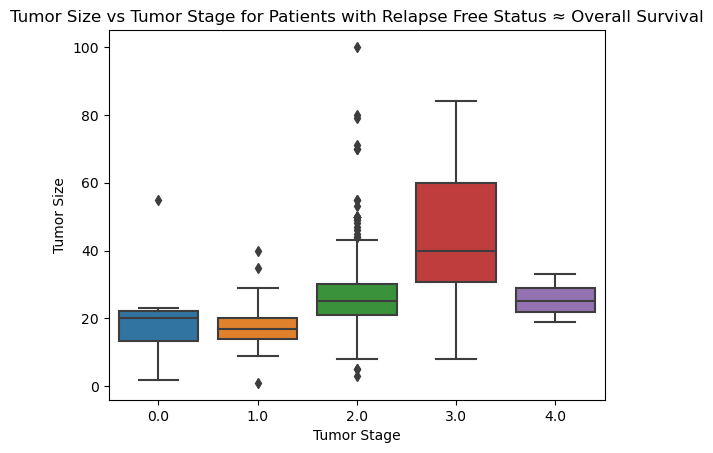

In [12]:
# Visualize distributions
sns.boxplot(x=close_cases['Tumor Stage'], y=close_cases['Tumor Size'])
plt.title("Tumor Size vs Tumor Stage for Patients with Relapse Free Status ≈ Overall Survival")
plt.show()

**Observations**:
1. **Tumor Size Increases with Tumor Stage**:
    - Median tumor size increases as the tumor stage progresses from Stage 0 to Stage 3
    - Patients in Stage 3 tend to have significantly larger tumors compared to earlier stages.

2. **Stage 4 Exception**:
    - In Stage 4, the median tumor size appears smaller than in Stage 3. This could be due to:
        - A smaller sample size in Stage 4
        - Aggressive treatment or different progression patterns for Stage 4 tumors.

3. **Outliers**:
    - There are several outliers across all stages, especially in Stage 2 and Stage 3, where tumor size exceeds 80. These could represent rare cases of extremely large tumors.

### Investigating Outliers

Identify the patients with large tumor sizes (**assuming** above 80) and analyze their other features, such as treatment outcomes and survival times.

In [13]:
# identify outliers with tumor size > 80
outliers = close_cases[close_cases['Tumor Size'] > 80]
print("Outliers with large Tumor Sizes: ")
print(outliers)

Outliers with large Tumor Sizes: 
    Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
497    MB-0657             58.65             Mastectomy  Breast Cancer   
504    MB-0664             78.27             Mastectomy  Breast Cancer   

                  Cancer Type Detailed Cellularity Chemotherapy  \
497  Breast Invasive Lobular Carcinoma    Moderate           No   
504   Breast Invasive Ductal Carcinoma        High          Yes   

    Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
497                 claudin-low     1.0                   Positve  ...   
504                       Basal     1.0                  Negative  ...   

    Overall Survival Status  PR Status Radio Therapy  \
497                  Living   Negative           Yes   
504                Deceased   Negative           Yes   

    Relapse Free Status (Months) Relapse Free Status     Sex  \
497                        30.03        Not Recurred  Female   
504                  

In [14]:
# Summarize key features for these outliers
key_features = ['Tumor Stage', 'Overall Survival (Months)', 'Relapse Free Status (Months)', 
                'Lymph nodes examined positive', "Patient's Vital Status"]
outliers[key_features]

,Tumor Stage,Overall Survival (Months),Relapse Free Status (Months),Lymph nodes examined positive,Patient's Vital Status
497,2.0,30.433333,30.03,0.0,Living
504,3.0,11.066667,10.92,10.0,Died of Disease


#### Key Insights:
1. **Patient with Tumor Stage 2.0**:
    - Despite having a larger tumor size, the absence of positive lymph nodes and an intermediate stage (Stage 2) likely contributed to a favorable outcome.
    - Being relapse-free throughout survival suggests effective treatment or a less aggressive tumor biology.

2. **Patient with Tumor Stage 3.0**:
    - The advanced tumor stage (Stage 3) and high number of positive lymph nodes suggest an aggressive disease course.
    - Short overall survival (11 months) and nearly equal relapse-free status indicate rapid disease progression post-relapse or limited treatment response.

#### Comparative Insights:
1. **Tumor Size Alone is Not Deterministic**:
    - Patient with Tumor Stage 2.0 demonstrates that a large tumor size (80+) does not always predict poor outcomes if other factors, such as lymph node status, are favorable.
    - Patient with Tumor Stage 3.0 highlights that large tumor size, combined with lymph node involvement and advanced stage, leads to poor prognosis.

2. **Lymph Node Involvement**:
    - The presence of 10 positive lymph in Patient with Tumor 3.0 is a strong indicator of aggressive disease and poor survival.
    - The absence of lymph node involvement in Patient with Tumor 2.0 likely contributed to thier long survival despite the large tumor size.

### Explore Stage 4 Characteristics:
    - Investigate why Stage 4 tumors show smaller sizes than Stage 3. This could involve:
        - Comparing survival times for Stage 3 vs Stage 4
        - Checking treatment and relapse patterns

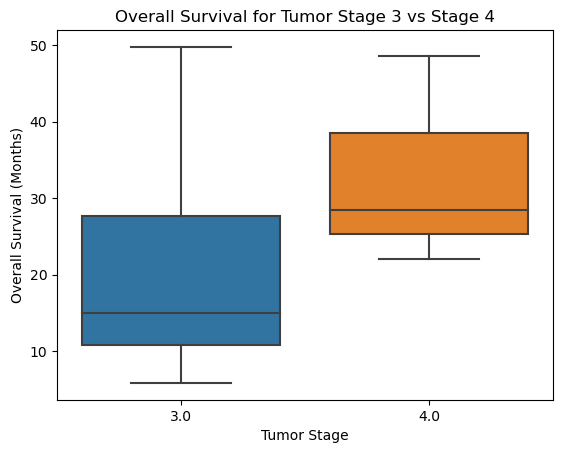

In [15]:
# Compare survival times for Stage 3 and Stage 4
stage_3_4 = close_cases[close_cases['Tumor Stage'].isin([3, 4])]
sns.boxplot(x=stage_3_4['Tumor Stage'], y=stage_3_4['Overall Survival (Months)'])
plt.title("Overall Survival for Tumor Stage 3 vs Stage 4")
plt.show()

**Observations**:
1. **Stage 4 Patients Have Shorter Survival**:
    - The median overall survival for Stage 4 patients is significantly lower than for Stage 3 patients.
    - This aligns with the expection that Stage 4 (metastatic cancer) generally has worse prognosis due to distant spread.

2. **Less Variability in Stage 4 Survival**:
    - The interquartile range (IQR) for Stage 4 in narrower compared to Stage 3, indicating less variability in survival outcomes for Stage 4 patients.
    - This could reflect uniformily poor outcomes for advanced metastatic disease.

3. **Longer Survivors in Stage 3**:
    - Stage 3 has a wider range of survival times, with some patients surviving up to ~50 months.
    - This suggests more variability in response to treatment or tumor aggressiveness within Stage 3.

### Correlation Analysis:
Investigate whether the relationship between tumor size and stage is consistent across other groups in the dataset (not just those with `Relapse Free Status ~= Overall Survival`)

In [16]:
# Correlation across the entire dataset
correlation = data['Tumor Size'].corr(data['Tumor Stage'])
print(f"Correlation between Tumor Size and Tumor Stage: {correlation}")

Correlation between Tumor Size and Tumor Stage: 0.39535734740621215


**Interpretation**
1. **Moderate Positive Correlation**:
    - As **Tumor Size** increases, **Tumor Stage** tends to increase, but the relationship is not strong.
    - This suggests that tumor size is one of several factors contributing to tumor stage, but not the only determinant.

2. **Stage-Size Relationship**:
    - While tumor size increases moderately with stage, higher stages may also involve other factors such as:
        - Lymph node involvement.
        - Distant metastasis (Stage 4)

In [17]:
# Correlation between Tumor Stage and other key features
key_features = ['Lymph nodes examined positive', 'Relapse Free Status (Months)', 'Tumor Size']
correlation_with_stage = data[key_features + ['Tumor Stage']].corr()['Tumor Stage']
print("Correlation of Tumor Stage with other features:")
print(correlation_with_stage)

Correlation of Tumor Stage with other features:
Lymph nodes examined positive    0.344123
Relapse Free Status (Months)    -0.197936
Tumor Size                       0.395357
Tumor Stage                      1.000000
Name: Tumor Stage, dtype: float64


**Interpretation of Correlation with Tumor Stage**

1. **Tumor Size (0.395)**
    - Moderate positive correlation with Tumor Stage.
    - This indicates that as tumor size increases, the tumor stage tends to increase, but size alone does not fully determine staging.

2. **Lymph Nodes Examined Positive (0.344)**
    - Moderate correlation suggests that higher tumor stage is associated with more positive lymph nodes, which is expected as staging considers lymphatic spread.
    
3. **Relapse Free Status (-0.198)**
    - Weak negative correlation with Tumor Stage.
    - This suggests that higher tumor stage patients tend to relapse sooner, but the relationship is not very strong. Other factors may influence relapse time.

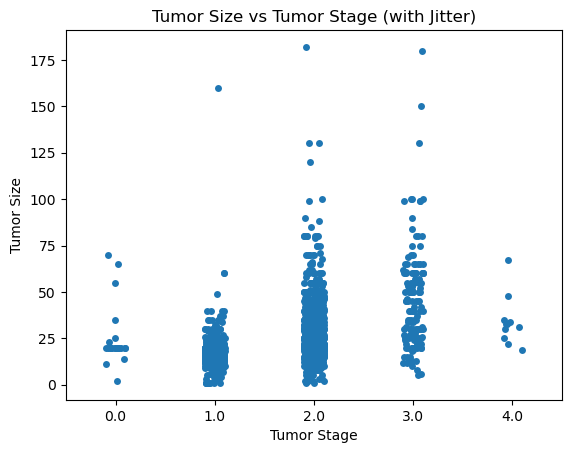

In [18]:
sns.stripplot(x=data['Tumor Stage'], y=data['Tumor Size'], jitter=True)
plt.title("Tumor Size vs Tumor Stage (with Jitter)")
plt.show()

**Interpretation of the Jitter Plot: Tumor Size vs Tumor Stage**

1. **Tumor Size Varies Across Stages but Overlaps Considerably**
    - While median tumor size increases with tumor stage, there is significant overlap between stages.
    - Some Stage 0 and Stage 1 patients have relatively large tumors, while some Stage 3 and Stage 4 patients have smaller tumors.
    - This reinforces the earlier finding that tumor size alone is not a definitive indicator of tumor stage.
    
2. **Stage 2 & Stage 3 Show the Largest Spread**
    - These stages have the widest distribution of tumor sizes, suggesting that staging factors beyond tumor size (e.g., lymph node involvement, metastasis) play a significant role.
    
3. **Stage 4 Tumors Are Often Smaller**
    - This aligns with previous findings where Stage 4 tumors were sometimes smaller than Stage 3 tumors, likely due to the role of metastasis in staging rather than localized tumor size.

In [19]:
# Correlation within Stage 3 and Stage 4 subgroups
stage_3_correlation = data[data['Tumor Stage'] == 3]['Tumor Size'].corr(data[data['Tumor Stage'] == 3]['Lymph nodes examined positive'])
stage_4_correlation = data[data['Tumor Stage'] == 4]['Tumor Size'].corr(data[data['Tumor Stage'] == 4]['Lymph nodes examined positive'])

print(f"Correlation between Tumor Size and Lymph Nodes Examined Positive:")
print(f"Stage 3: {stage_3_correlation}")
print(f"Stage 4: {stage_4_correlation}")

Correlation between Tumor Size and Lymph Nodes Examined Positive:
Stage 3: 0.16766511916566978
Stage 4: 0.21398214166924284


**Interpretation of Correlation Within Stage 3 and Stage 4 Subgroups**

1. **Stage 3 Correlation (0.167)**
    - Weak positive correlation between Tumor Size and Lymph Nodes Examined Positive.
    - Larger tumors in Stage 3 do not necessarily correspond to higher lymph node involvement, suggesting other factors influence nodal spread.
    
2. **Stage 4 Correlation (0.214)**
    - Slightly stronger correlation in Stage 4 compared to Stage 3.
    - This indicates that in metastatic cancer (Stage 4), there is a slightly greater likelihood that larger tumors are associated with more positive lymph nodes.
    - However, the correlation remains weak, reinforcing the idea that metastasis occurs independently of tumor size.

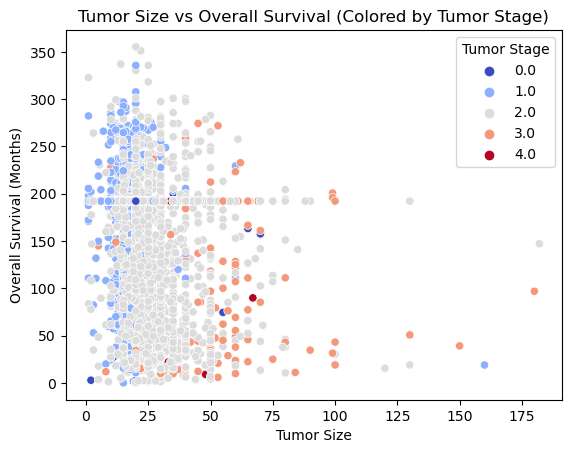

In [20]:
#  validate Tumor Size’s Contribution to Survival
sns.scatterplot(x=data['Tumor Size'], y=data['Overall Survival (Months)'], 
                hue=data['Tumor Stage'], palette='coolwarm')
plt.title("Tumor Size vs Overall Survival (Colored by Tumor Stage)")
plt.show()

**Interpretation of Tumor Size vs. Overall Survival (Colored by Tumor Stage)**

1. **No Clear Direct Relationship Between Tumor Size and Survival**
    - While some smaller tumors correspond to longer survival, there are many cases where large tumors still have long survival times.
    - Suggests that tumor size alone is not a strong predictor of overall survival.
    
2. **Higher Stage Tumors (Red for Stage 4) Are Associated with Lower Survival**
    - Lower survival times are predominantly seen in higher-stage tumors (Stage 3 & 4).
    - This reinforces the idea that tumor stage, which includes metastasis and lymph node involvement, is more influential than just tumor size.
    
3. **Stage 0 and 1 Tumors (Blue) Are Spread Across Higher Survival Times**
    - Many low-stage tumors (blue dots) correspond to longer survival (~200+ months).
    - Indicates that early-stage diagnosis is associated with better survival, likely due to successful treatment.

#### Check for Survival Trends:
Does larger tumor size correspond to shorter survival times within each stage?

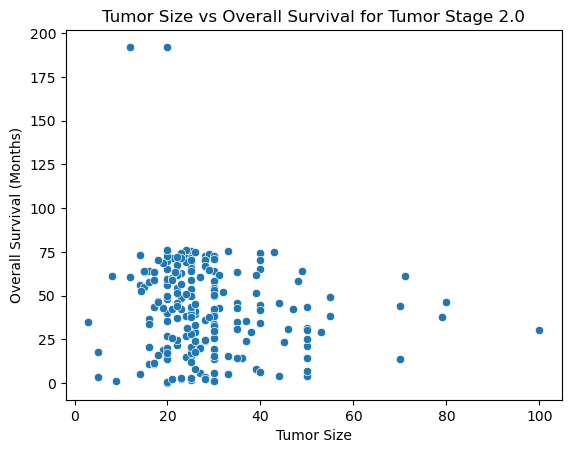

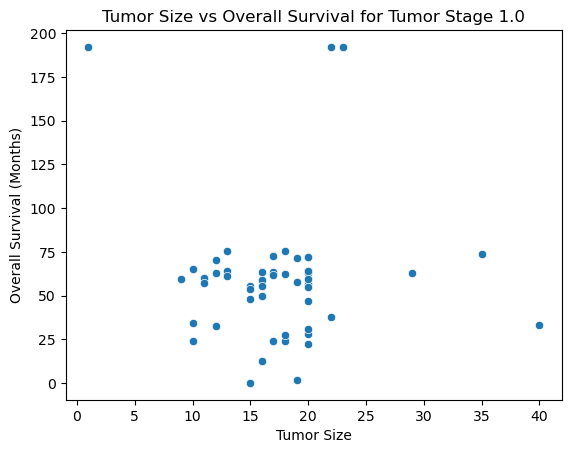

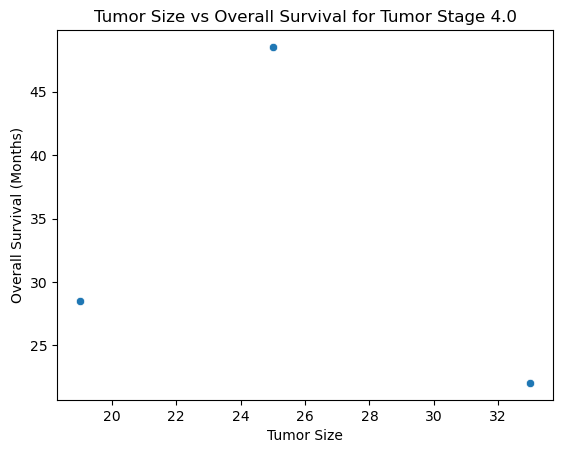

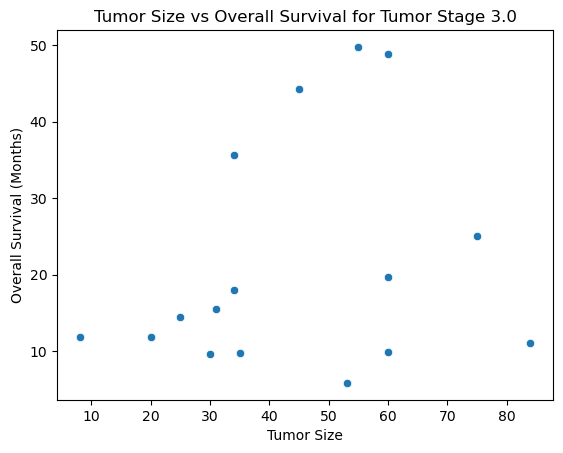

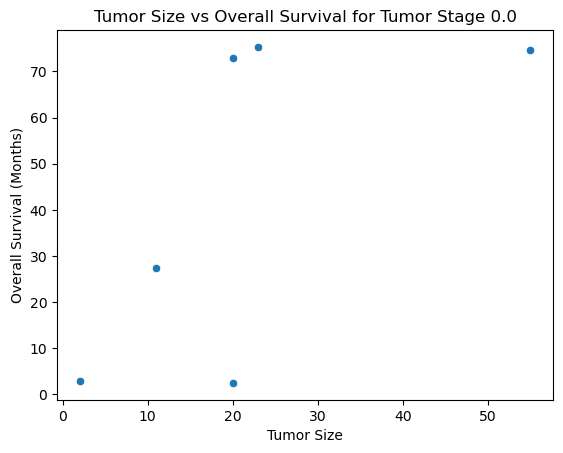

In [21]:
# Relationship between Tumor Size and Overall Survival within each stage
for stage in data['Tumor Stage'].unique():
    stage_data = close_cases[close_cases['Tumor Stage'] == stage]
    sns.scatterplot(x=stage_data['Tumor Size'], y=stage_data['Overall Survival (Months)'])
    plt.title(f"Tumor Size vs Overall Survival for Tumor Stage {stage}")
    plt.show()

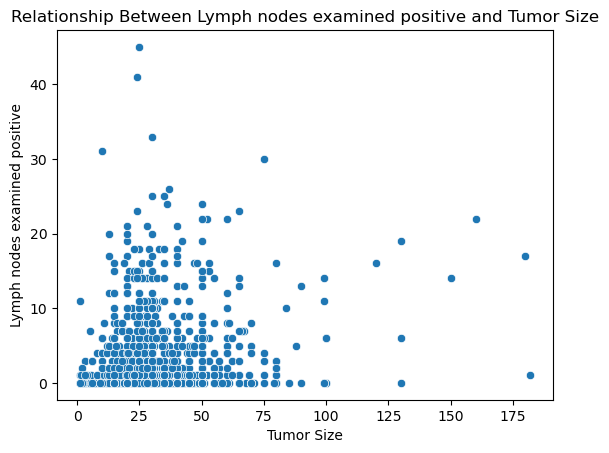

In [22]:
# scatter plot
sns.scatterplot(x=data['Tumor Size'], 
                y=data['Lymph nodes examined positive'])
plt.title("Relationship Between Lymph nodes examined positive and Tumor Size")
plt.xlabel("Tumor Size")
plt.ylabel("Lymph nodes examined positive")
plt.show()

1. **Clustered Points**:
- There’s a significant clustering of data points for smaller tumor sizes (below ~50) and lymph nodes examined positive values below ~10. This suggests most patients in the dataset had smaller tumor sizes with fewer positive lymph nodes.

2. **Positive Trend (Weak Correlation)**:
- A loose upward trend is visible, indicating that as Tumor Size increases, the likelihood of having more Lymph Nodes Examined Positive also increases, though the relationship is not strong.

3. **Outliers**:
- A few extreme points are visible:
    - Tumor sizes above ~125 with fewer positive lymph nodes.
    - Cases where lymph nodes examined positive exceed 30, even with relatively small tumors.